In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

## Dataset

In [124]:
data = np.loadtxt('data.csv', delimiter=',')
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [125]:
X = data[:,:-1]
y = data[:,-1]
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [126]:
len(X), len(y)

(150, 150)

## Preprocessing

In [127]:
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
X = (X - min_vals) / (max_vals - min_vals)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [128]:
feature_column = X[:, 0]

q25 = np.percentile(feature_column, 25)
q75 = np.percentile(feature_column, 75)

categorical_feature = np.zeros_like(feature_column, dtype=int)
categorical_feature[(feature_column >= q25) & (feature_column < q75)] = 1
categorical_feature[feature_column >= q75] = 2

In [129]:
X = np.column_stack((X, categorical_feature))

In [130]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 1.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 1.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 1.        ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.13888889, 0.41666667, 0.06779661, 0.        , 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        , 0.        ],
       [0.41666667, 0.83333333, 0.

## Train-Test split

In [131]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_point = int((1 - test_size) * X.shape[0])

    train_indices = indices[:split_point]
    test_indices = indices[split_point:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
len(X_train), len(X_test)

(120, 30)

# Model selection

In [239]:
rfclf = RandomForestClassifier()

In [240]:
rfclf.fit(X_train, y_train)

RandomForestClassifier()

In [241]:
y_test_pred = rfclf.predict(X_test)
y_test_prob = rfclf.predict_proba(X_test)

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def show_metrics(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted')}")

In [243]:
show_metrics(y_test, y_test_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


## Experimenting

In [344]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
from sklearn.base import BaseEstimator, TransformerMixin
class AddFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        feature_column = X[:, 0]
        self.q25 = np.percentile(feature_column, 25)
        self.q75 = np.percentile(feature_column, 75)
        return self

    def transform(self, X, y=None):
        feature_column = X[:, 0]
        categorical_feature = np.zeros_like(feature_column, dtype=int)
        categorical_feature[(feature_column >= self.q25) & (feature_column < self.q75)] = 1
        categorical_feature[feature_column >= self.q75] = 2
        X_transformed = np.c_[X, categorical_feature]
        return X_transformed

In [346]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pipeline1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42))
])

pipeline3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('add_feature', AddFeature()),
    ('classifier', RandomForestClassifier(n_estimators=5, max_depth=1, random_state=42))
])

pipeline4 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

pipeline5 = Pipeline([
    ('scaler', StandardScaler()),
    ('add_feature', AddFeature()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

In [347]:
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)
pipeline4.fit(X_train, y_train)
pipeline5.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('add_feature', AddFeature()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [348]:
y_pred_exibit_1 = pipeline1.predict(X_test)
y_pred_exibit_2 = pipeline2.predict(X_test)
y_pred_exibit_3 = pipeline3.predict(X_test)
y_pred_exibit_4 = pipeline4.predict(X_test)
y_pred_exibit_5 = pipeline4.predict(X_test)

In [349]:
show_metrics(y_test, y_pred_exibit_1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [350]:
show_metrics(y_test, y_pred_exibit_2)

Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-Score: 0.966750208855472


In [351]:
show_metrics(y_test, y_pred_exibit_3)

Accuracy: 0.6333333333333333
Precision: 0.4683333333333334
Recall: 0.6333333333333333
F1-Score: 0.5195402298850574


/home/dmitr/programs/spbu-python-course/pyenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [352]:
show_metrics(y_test, y_pred_exibit_4)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [353]:
show_metrics(y_test, y_pred_exibit_5)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### Вывод

Вообще говоря, какие либо выводы сделать невозможно в силу того, что при различном объеме тестовой выборки для каждого пайплайна координально меняются результаты метрик. Например при объеме выборки в `0.2` у нас нет зависимости от выбора препроцессинга (что впринципе и стоит ожидать от случайного леса), Но при этом огромная разница между ансамблем из 100 деревьев глубины 10 и количества деревьев 100 от деревьев с маленьким количеством деревьев и малой глубиной. 

Но уже при размере тестовой выборки в `0.4` получаем идеальный классвификатор для леса на 5 эстиматоров глубины 10 и неидеальный для всех остальных. Такую волатильность относительно размера выборки можно ожидать при работе с случайным лесом и 4 фичами на `150 * (1 - test_size)` объекта.

Так как был выбран RandomForest. Большое начение имели гиперпараметры `max_depth` и `n_estimators`.

Малое значение имело добавление дополнительной фичи, прямо зависящей от первой и выбор метода препроцессинга.

Скорее всего я получил так называемый `overfitting`

## Visualization

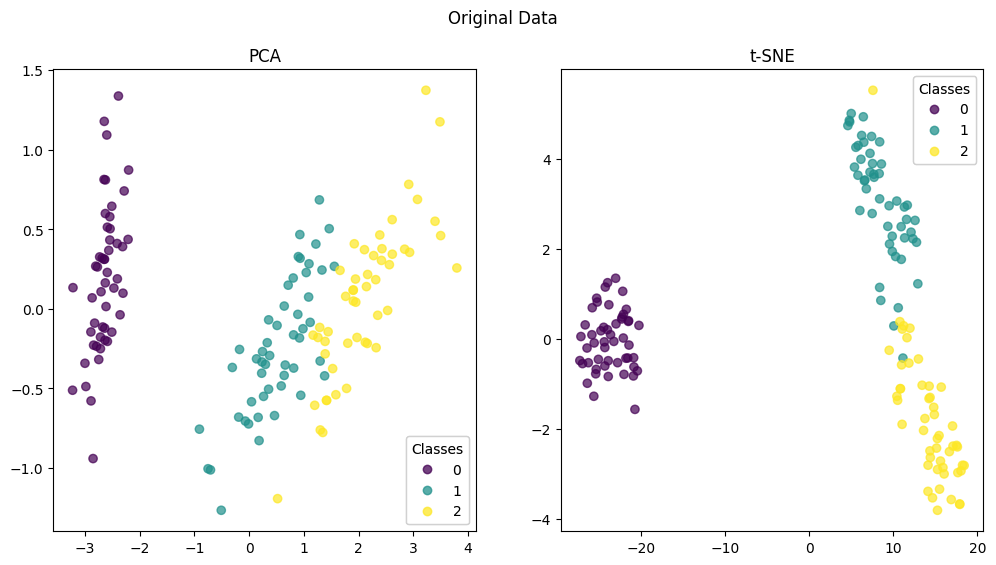

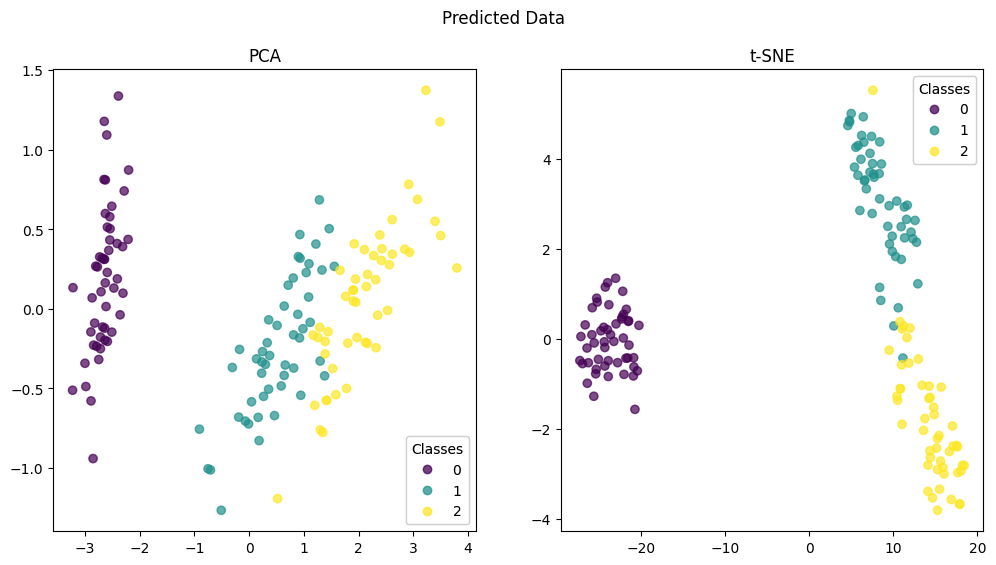

In [354]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_scatter(X, y, title):
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2,perplexity=min(30, X.shape[0] - 1), random_state=42)

    X_pca = pca.fit_transform(X)
    X_tsne = tsne.fit_transform(X)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # PCA
    scatter = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    legend = ax[0].legend(*scatter.legend_elements(), title="Classes")
    ax[0].add_artist(legend)
    ax[0].set_title('PCA')

    # t-SNE
    scatter = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    legend = ax[1].legend(*scatter.legend_elements(), title="Classes")
    ax[1].add_artist(legend)
    ax[1].set_title('t-SNE')

    plt.suptitle(title)
    plt.show()

plot_scatter(X, y, title='Original Data')

plot_scatter(X, pipeline1.predict(X), title='Predicted Data')